## CCTV Locations in Baltimore

In [5]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn import linear_model, model_selection, preprocessing, metrics, datasets
from sklearn.multiclass import OneVsRestClassifier
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score

/home/payal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
cctv = pd.read_csv("CCTV_Locations.csv")

cctv.head()

,cameraLocation,cameraNumber,cameraProject,Location 1
0,Eutaw and Lexington Market,1,Downtown,"(39.290996, -76.621073999999993)"
1,Eutaw and Fayette,2,Downtown,"(39.29048796517317, -76.623665143680341)"
2,Eutaw and Baltimore,3,Downtown,"(39.289324000000001, -76.620985000000005)"
3,Eutaw and Redwood,4,Downtown,"(39.288677999999997, -76.620947999999999)"
4,Eutaw and Lombard,5,Downtown,"(39.287528000000002, -76.620853999999994)"


In [8]:
cctv_lat = []
cctv_lon = []

cctv_loc = cctv['Location 1'].tolist()

for index in range(len(cctv)):
     cctv_lat.append(float(cctv_loc[index].split(",")[0][1:]))
     cctv_lon.append(float(cctv_loc[index].split(",")[1][:-1]))

In [8]:
#Plot permit locations on map of baltimore

import plotly.graph_objs as bp
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

     

data = bp.Data([
    bp.Scattermapbox(
        lat=cctv_lat,
        lon=cctv_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = bp.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicHNpbmdocGF5YWwiLCJhIjoiY2o5MzhtamF5M3RhcTJ4bXJsdnA2Z3ZjbiJ9.lwJJeMpfCBEaxF-A7tRqBw',
        bearing=0,
        center=dict(
            lat=39.286138,
            lon=-76.603388
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='CCTV_Locations' )

In [ ]:
#### TODO: areas with more permits have more CCTVs

## Find best locations for CCTV cameras based on crime and citation data

Get high crime/citation areas from crimes/citations datasets, then check if there is a cctv camera there. If there is, map that point in a different color, if there isn't, then a different color


In [7]:
bpd = pd.read_csv('BPD_Arrests.csv')

bpd['IncidentOffense'] = bpd['IncidentOffense'].str.lower()
relevant_crimes = pd.DataFrame()

# list of relevant offenses and extract relevant rows

offense = ['6elarceny- auto acc','7astolenauto', '3brobb highway (ua)', '3bjrobb carjack (ua)','3ajfrobb carjack-firearm', '6dlarceny- from auto', '26recovered vehicle', '8harson motor veh', '6flarceny- bicycle', '24towed vehicle', '3aorobb hwy-other wpn', '3ajkrobb carjack-knife', '7cstolen veh./other', '112traffic related incident', '20jtransport', '3ajorobb carjack-other wpn', '3af-robb hwy-firea']

relevant_crimes = bpd[bpd['IncidentOffense'].isin(offense)]

relevant_crimes.count()



Arrest               575
Age                  575
Sex                  575
Race                 575
ArrestDate           575
ArrestTime           575
ArrestLocation       490
IncidentOffense      575
IncidentLocation     551
Charge               564
ChargeDescription    575
District             488
Post                 488
Neighborhood         488
Longitude            488
Latitude             488
Location 1           488
dtype: int64

In [10]:
#Plot incident locations on map of baltimore

import plotly.graph_objs as bp
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

bpd_lon = relevant_crimes['Longitude'].tolist()
bpd_lat = relevant_crimes['Latitude'].tolist()

data = bp.Data([
    bp.Scattermapbox(
        lat=bpd_lat,
        lon=bpd_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    ),
    bp.Scattermapbox(
        lat=cctv_lat,
        lon=cctv_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = bp.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicHNpbmdocGF5YWwiLCJhIjoiY2o5MzhtamF5M3RhcTJ4bXJsdnA2Z3ZjbiJ9.lwJJeMpfCBEaxF-A7tRqBw',
        bearing=0,
        center=dict(
            lat=39.286138,
            lon=-76.603388
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='Relevant_Crimes' )

## K-Means Clustering for CCTV locations vs clusters for crimes

In [72]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn import decomposition
from sklearn import manifold
import pylab as pl
import collections
from scipy.cluster import hierarchy
from sklearn import cluster
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import pairwise_distances
import re
import time

In [73]:
cctv = pd.read_csv("CCTV_Locations.csv")

cctv['lat'] = pd.DataFrame(cctv_lat)
cctv['lon'] = pd.DataFrame(cctv_lon)
del cctv['Location 1']

cctv.head()

,cameraLocation,cameraNumber,cameraProject,lat,lon
0,Eutaw and Lexington Market,1,Downtown,39.290996,-76.621074
1,Eutaw and Fayette,2,Downtown,39.290488,-76.623665
2,Eutaw and Baltimore,3,Downtown,39.289324,-76.620985
3,Eutaw and Redwood,4,Downtown,39.288678,-76.620948
4,Eutaw and Lombard,5,Downtown,39.287528,-76.620854


In [74]:
kmeans = KMeans(n_clusters=5).fit(cctv[['lat', 'lon']])

In [75]:
km_clusters = kmeans.labels_
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4,

In [76]:
print(kmeans.inertia_)

0.113028500029


In [77]:
def kmeans_scatterplot(x, y, map_col, label_x, label_y):
    plt.scatter(x, y, c=map_col)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title('KMeans Clustering')
    plt.show()

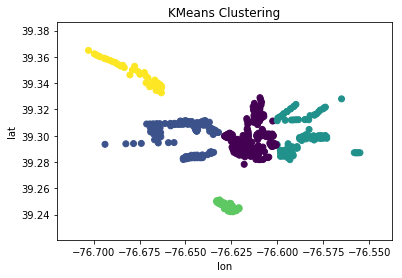

In [78]:
kmeans_scatterplot(cctv_lon, cctv_lat, km_clusters, 'lon', 'lat')

In [83]:
cctv_cluster_centers = kmeans.cluster_centers_

type(cctv_cluster_centers)

numpy.ndarray

In [84]:
bpd_1 = relevant_crimes.dropna()

#bpd_1.dtypes

In [85]:
kmeans = KMeans(n_clusters=5).fit(bpd_1[['Latitude', 'Longitude']])

0.25557409791


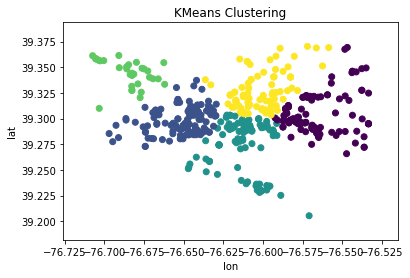

In [86]:
km_clusters = kmeans.labels_
print(kmeans.inertia_)
kmeans_scatterplot(bpd_1['Longitude'], bpd_1['Latitude'], km_clusters, 'lon', 'lat')


In [87]:
arrests_cluster_centers = kmeans.cluster_centers_

In [96]:
a = pd.DataFrame(arrests_cluster_centers, columns=['lat', 'lon'])
b = pd.DataFrame(cctv_cluster_centers, columns=['lat', 'lon'])

a

,lat,lon
0,39.304319,-76.565154
1,39.298132,-76.650906
2,39.278362,-76.612351
3,39.344367,-76.684784
4,39.327664,-76.601520


## Areas with more traffic related arrests have more cctv cameras ?

In [97]:
# Scatter plot - TODO - size of points proportional to cluster size

import plotly.graph_objs as bp
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

cctv_lon = a['lon'].tolist()
cctv_lat = a['lat'].tolist()

bpd_lon = b['lon'].tolist()
bpd_lat = b['lat'].tolist()

data = bp.Data([
    bp.Scattermapbox(
        lat=bpd_lat,
        lon=bpd_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    ),
    bp.Scattermapbox(
        lat=cctv_lat,
        lon=cctv_lon,
        mode='markers',
        marker=bp.Marker(
            size=14
        ),
        text=['Montreal'],
    )
])

layout = bp.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicHNpbmdocGF5YWwiLCJhIjoiY2o5MzhtamF5M3RhcTJ4bXJsdnA2Z3ZjbiJ9.lwJJeMpfCBEaxF-A7tRqBw',
        bearing=0,
        center=dict(
            lat=39.286138,
            lon=-76.603388
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='Relevant_Crimes' )